In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import collections
from scripts.plot import plot_from_files

def counts(data):
    return sorted(collections.Counter(data).items())

def head_and_tail(xs, n=5):
    if len(xs) <= 2*n:
        return xs
    return xs[:n] + ["..."] + xs[-n:]


In [2]:
def load_stats(path):
    return pd.read_table(path, names=['k', 'n', 'c', 'min', 'max', 'star'], sep=' ')

def remove_float_xticks():
    filtered = [t for t in plt.xticks()[0] if math.isclose(t, round(t))]
    plt.xticks(np.array(filtered))

def plot_histograms(df, v):
    df_v = df[df.k + df.n == v]
    min_k, max_k = df_v.k.min(), df_v.k.max()
    for k in range(min_k, max_k + 1):
        fig = plt.figure(figsize=(25, 2.5))
        fig.suptitle('n+k = {}, k = {}'.format(v, k))
        fig.tight_layout()
        attrs = [
            ('c', 'number of coefficients'),
            ('star', 'star coefficient value'),
        ]
        for attr_i, (attr, title) in enumerate(attrs):
            df_selected = df_v[df_v.k == k][attr]
            min_, max_ = df_selected.min(), df_selected.max()
            plt.subplot(1, 2, attr_i + 1)
            plt.title(title)
            df_selected.plot.hist(bins=np.arange(min_, max_ + 2)-0.5, logy=True, ylim=(1e-1, 1e8))
            plt.yticks(10 ** np.arange(0, 8))
            plt.grid(axis='y')
            remove_float_xticks()
        plt.show()
        print('star coefficient value counts:', *head_and_tail(counts(df_v[df_v.k == k].star)))
        print('----------')


# Flow Polynomial Coeffcients (Bridges Allowed)

`k` = number of outer vertices \
`n` = number of inner vertices \
star coefficient = the coeffcient with all outer vertices connected

In [3]:
df_stats_c2m2dP = load_stats('computed/stats-c2m2dP-26.txt.gz')


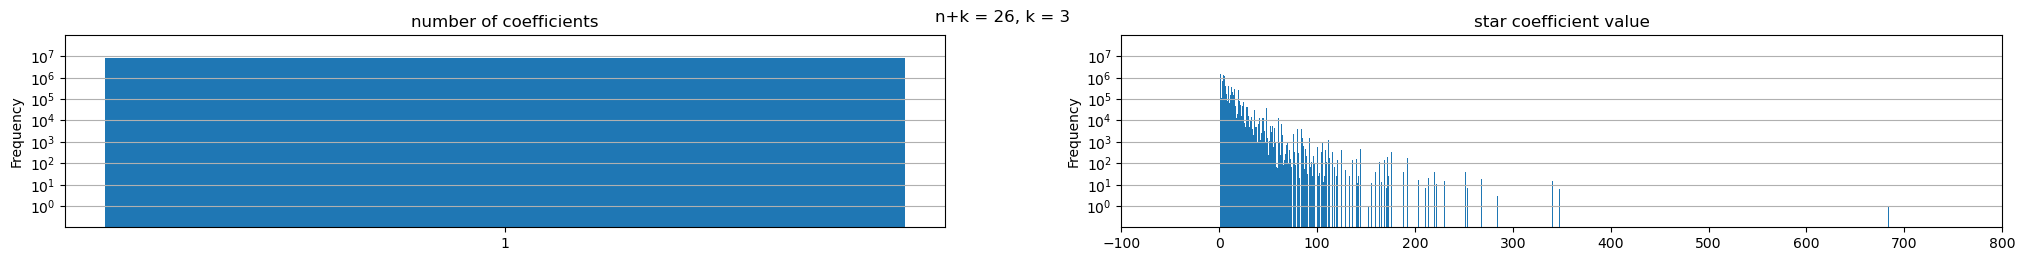

star coefficient value counts: (1, 1402804) (2, 115405) (3, 712684) (4, 1339944) (5, 1162075) ... (284, 3) (340, 14) (341, 13) (348, 6) (684, 1)
----------


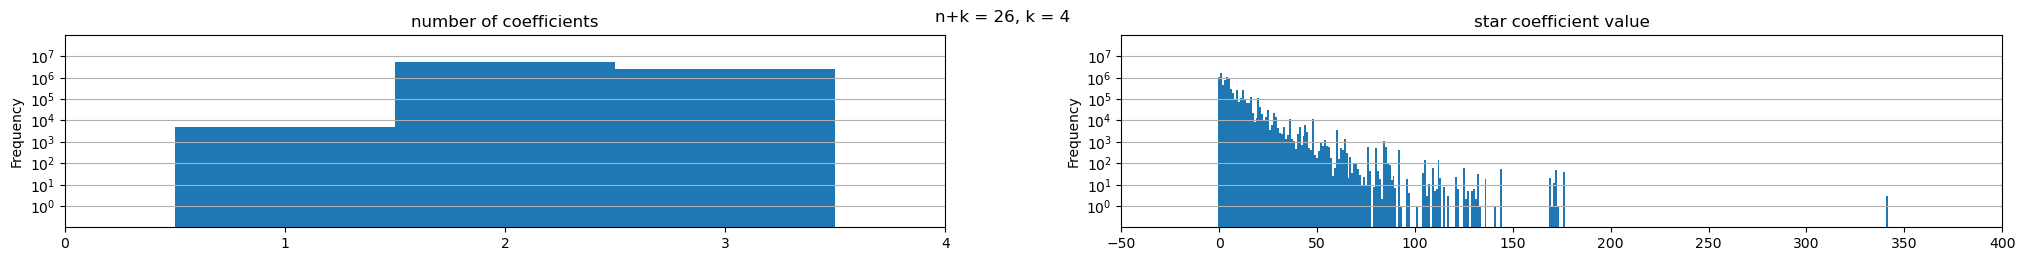

star coefficient value counts: (0, 1103696) (1, 1676633) (2, 441356) (3, 798345) (4, 1063717) ... (171, 12) (172, 46) (173, 1) (176, 38) (341, 3)
----------


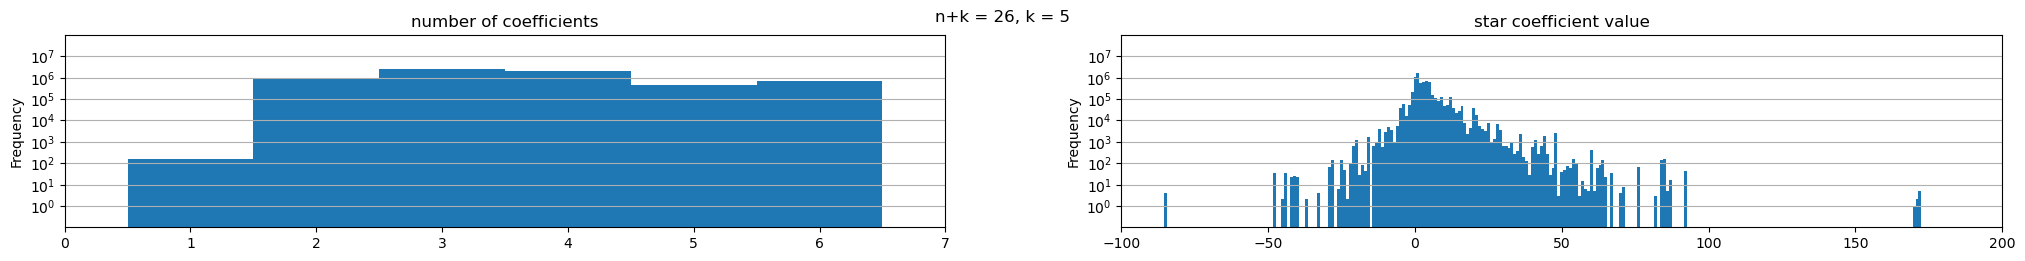

star coefficient value counts: (-85, 4) (-48, 36) (-45, 2) (-44, 35) (-42, 23) ... (87, 16) (92, 45) (170, 1) (171, 2) (172, 5)
----------


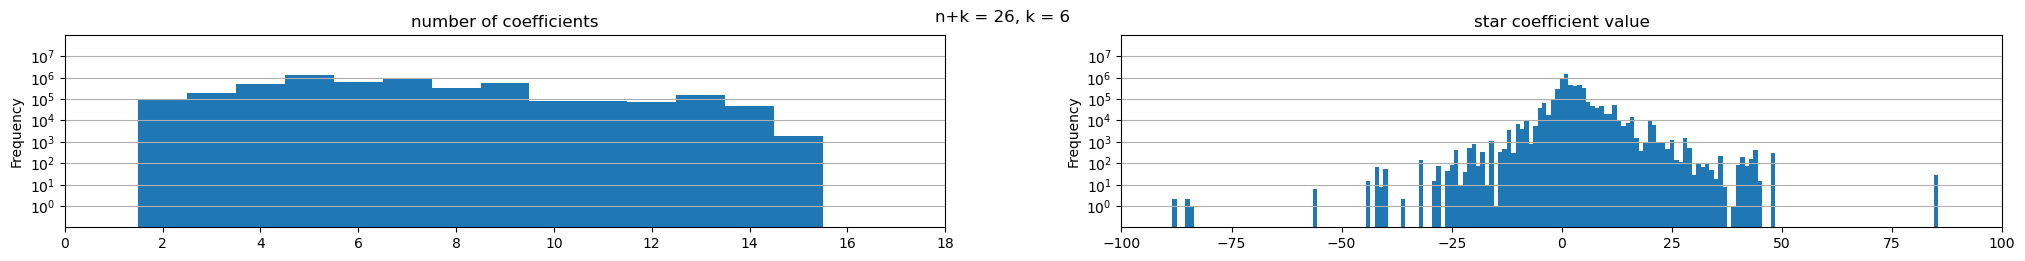

star coefficient value counts: (-88, 2) (-85, 2) (-84, 1) (-56, 6) (-44, 15) ... (43, 152) (44, 402) (45, 14) (48, 301) (85, 27)
----------


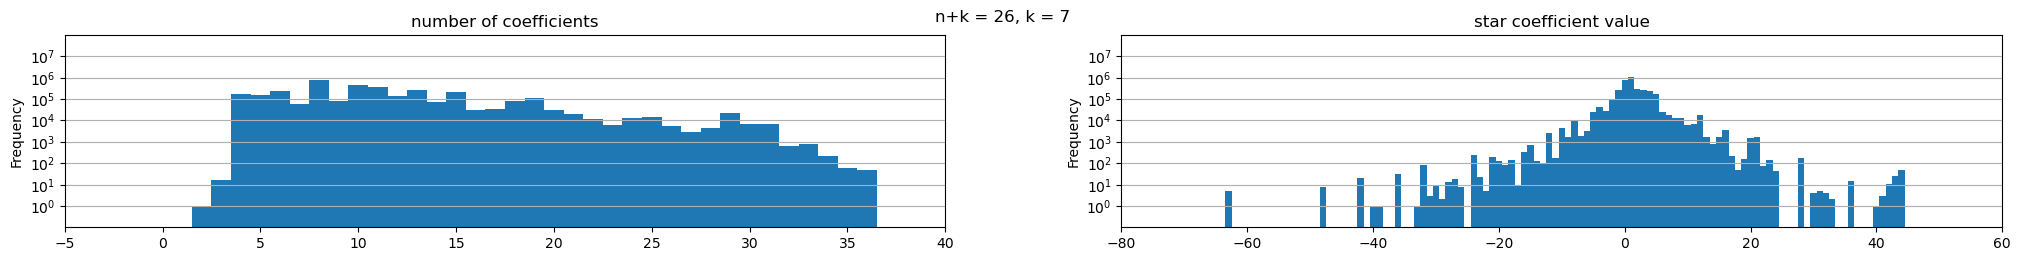

star coefficient value counts: (-63, 5) (-48, 8) (-42, 21) (-40, 1) (-39, 1) ... (40, 1) (41, 3) (42, 11) (43, 24) (44, 46)
----------


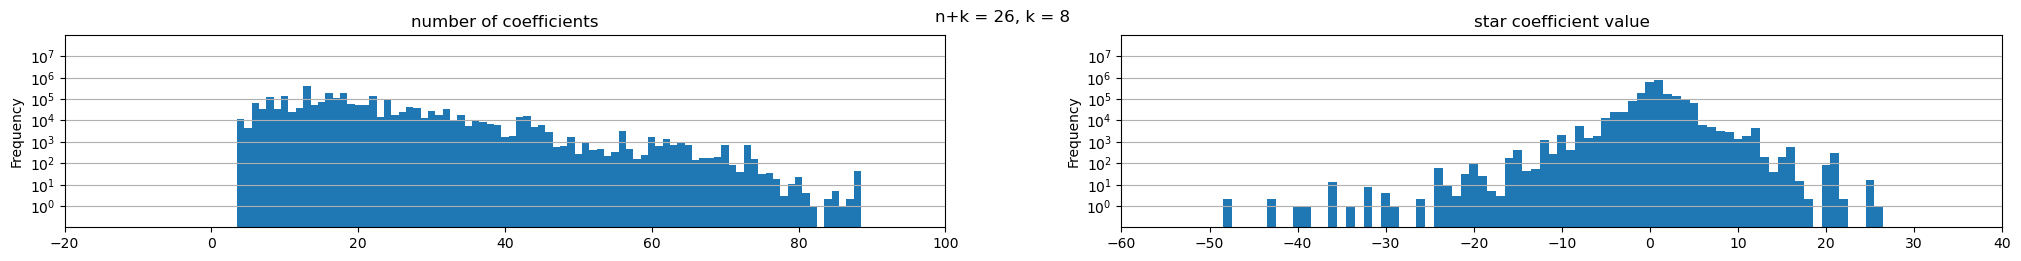

star coefficient value counts: (-48, 2) (-43, 2) (-40, 1) (-39, 1) (-36, 13) ... (20, 79) (21, 295) (22, 2) (25, 17) (26, 1)
----------


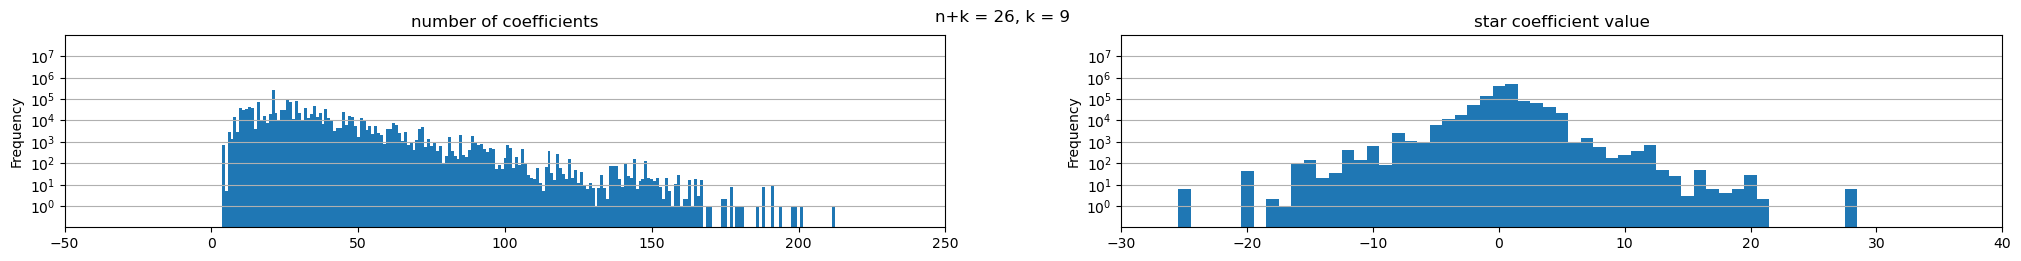

star coefficient value counts: (-25, 6) (-20, 42) (-18, 2) (-17, 1) (-16, 90) ... (18, 4) (19, 6) (20, 28) (21, 2) (28, 6)
----------


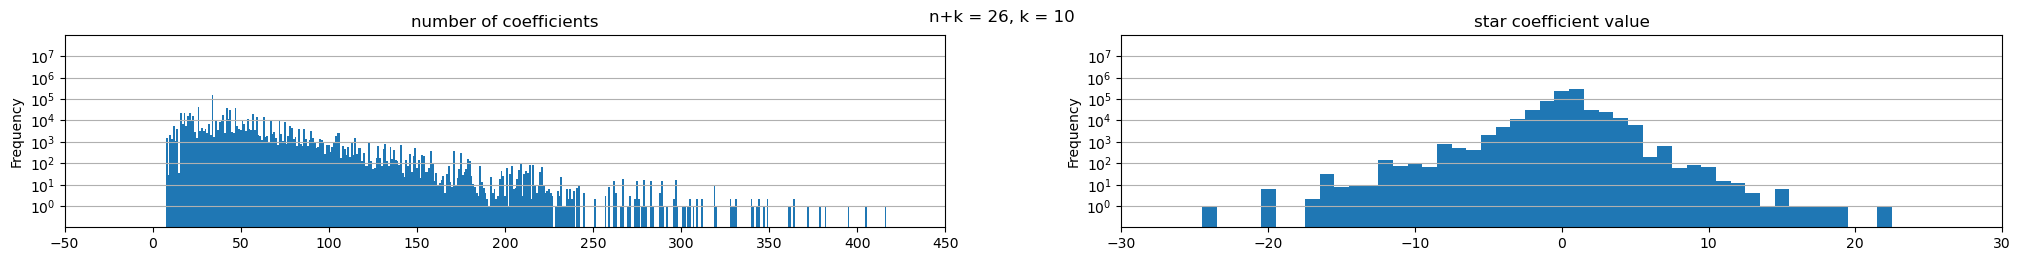

star coefficient value counts: (-24, 1) (-20, 6) (-17, 2) (-16, 31) (-15, 8) ... (16, 1) (17, 1) (18, 1) (19, 1) (22, 1)
----------


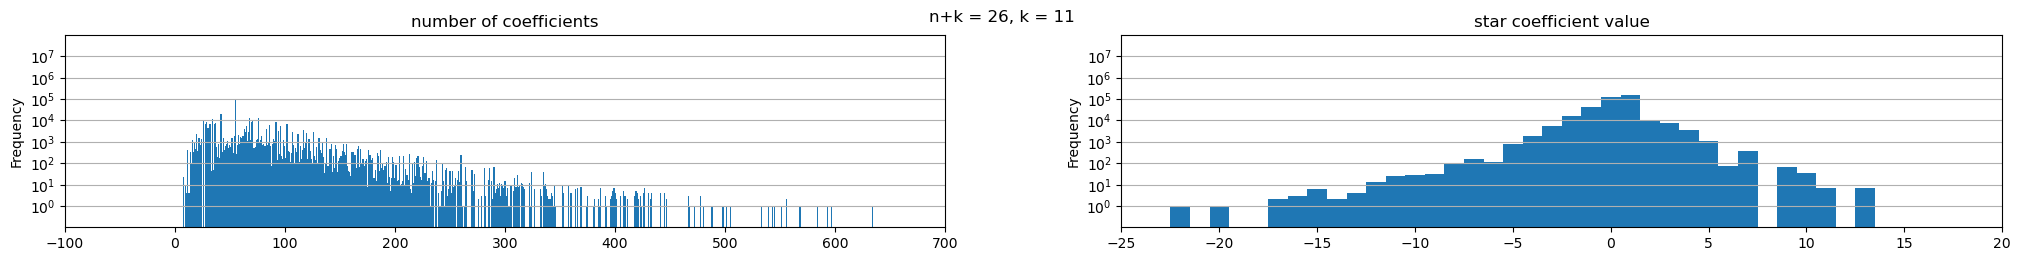

star coefficient value counts: (-22, 1) (-20, 1) (-17, 2) (-16, 3) (-15, 6) ... (7, 360) (9, 65) (10, 34) (11, 7) (13, 7)
----------


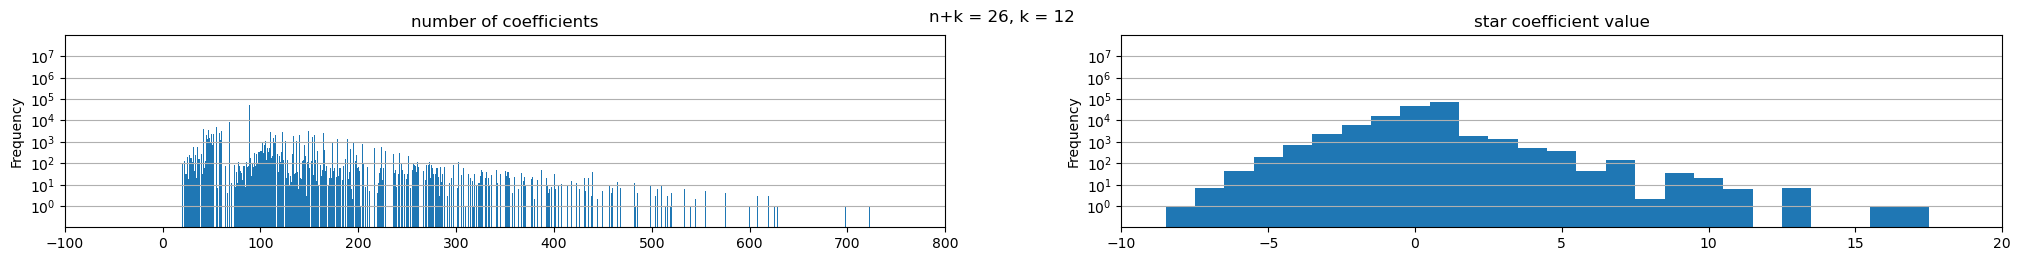

star coefficient value counts: (-8, 1) (-7, 7) (-6, 42) (-5, 187) (-4, 692) ... (10, 20) (11, 6) (13, 7) (16, 1) (17, 1)
----------


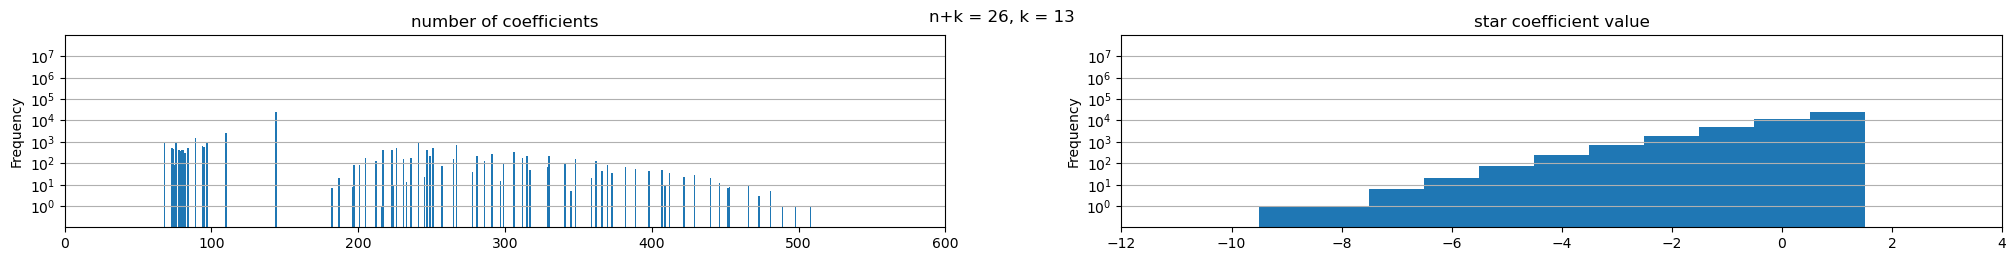

star coefficient value counts: (-9, 1) (-8, 1) (-7, 6) (-6, 20) (-5, 77) ... (-3, 728) (-2, 1952) (-1, 4866) (0, 11326) (1, 24892)
----------


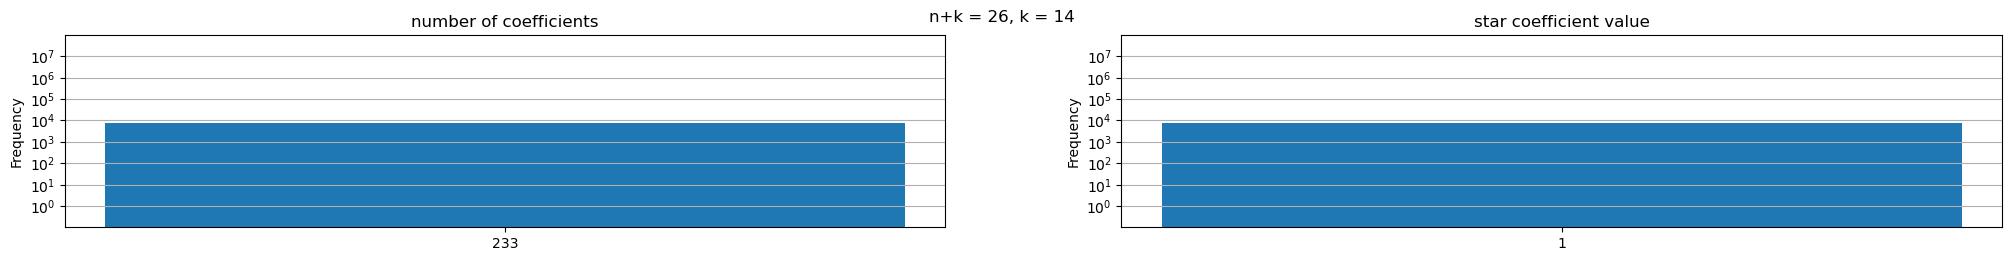

star coefficient value counts: (1, 7528)
----------


In [4]:
plot_histograms(df_stats_c2m2dP, 26)


# Flow Polynomial Coeffcients (Bridges Forbidden)

`k` = number of outer vertices \
`n` = number of inner vertices \
star coefficient = the coeffcient with all outer vertices connected

In [5]:
df_stats_dP = load_stats('computed/stats-dP-26.txt.gz')


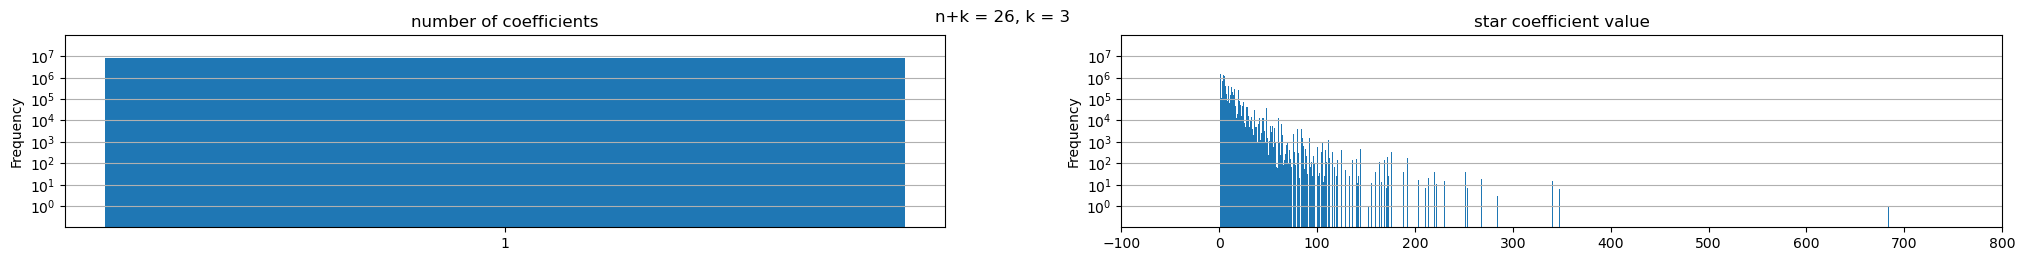

star coefficient value counts: (1, 1402804) (2, 115405) (3, 712684) (4, 1339944) (5, 1162075) ... (284, 3) (340, 14) (341, 13) (348, 6) (684, 1)
----------


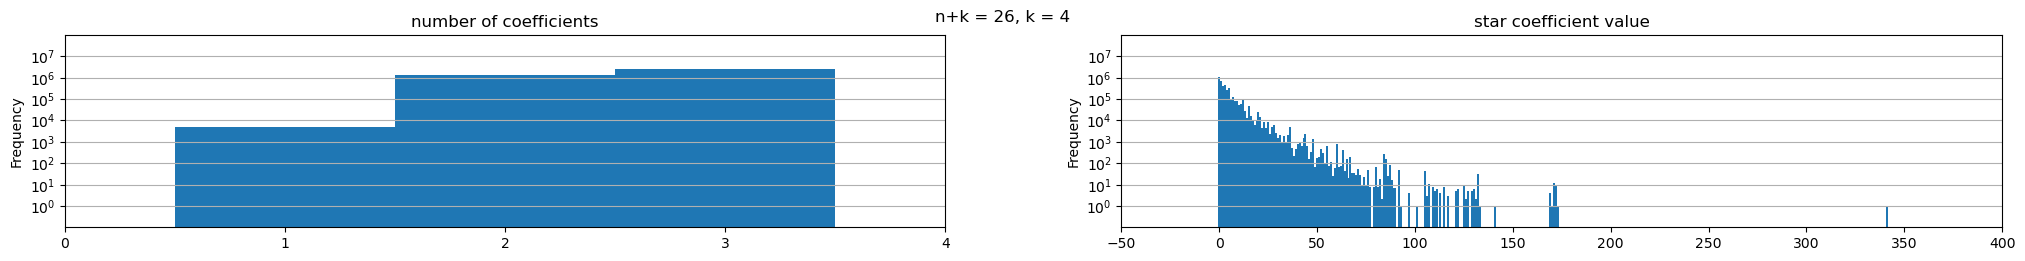

star coefficient value counts: (0, 1103696) (1, 668197) (2, 388633) (3, 434960) (4, 274631) ... (170, 1) (171, 12) (172, 9) (173, 1) (341, 1)
----------


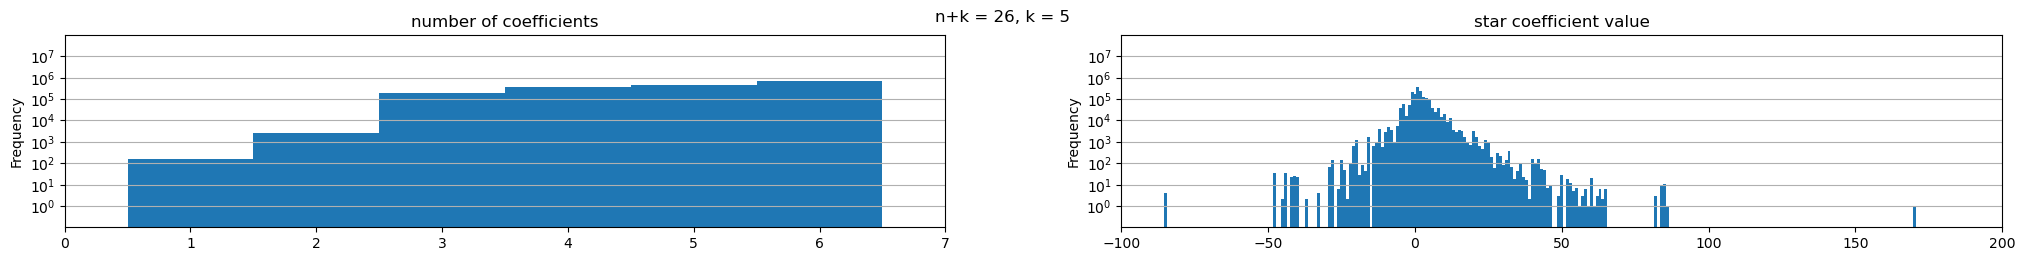

star coefficient value counts: (-85, 4) (-48, 36) (-45, 2) (-44, 35) (-42, 23) ... (82, 3) (84, 9) (85, 11) (86, 1) (170, 1)
----------


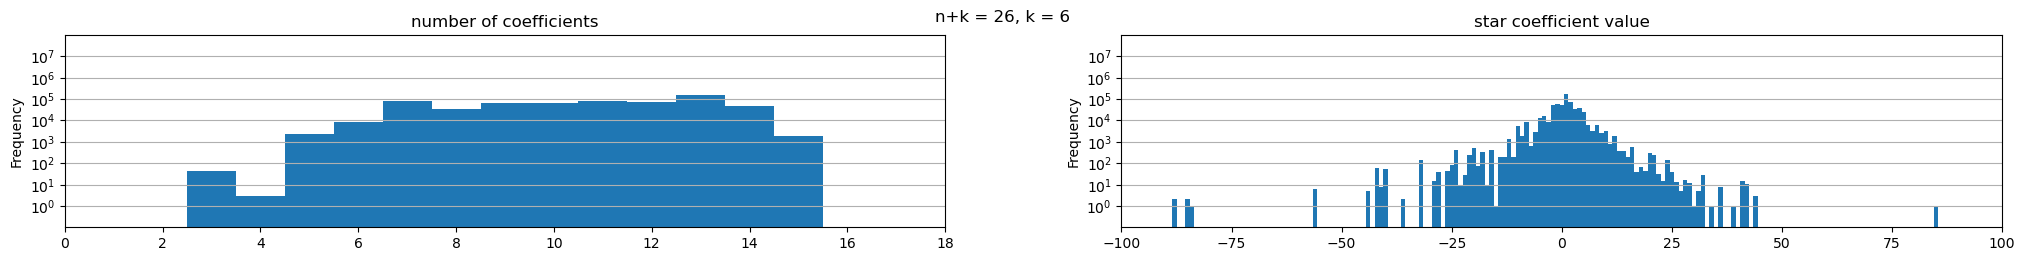

star coefficient value counts: (-88, 2) (-85, 2) (-84, 1) (-56, 6) (-44, 5) ... (39, 1) (41, 14) (42, 11) (44, 3) (85, 1)
----------


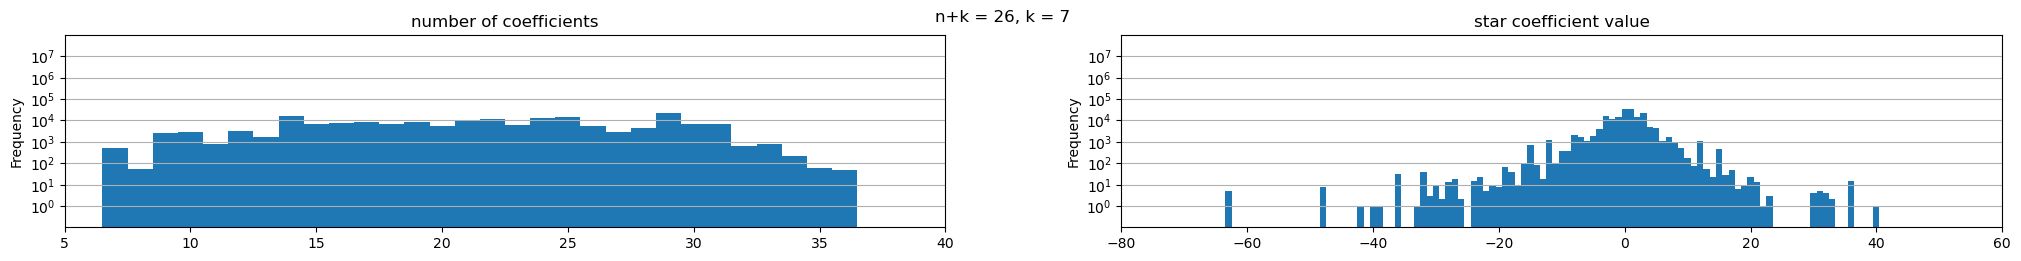

star coefficient value counts: (-63, 5) (-48, 8) (-42, 1) (-40, 1) (-39, 1) ... (31, 5) (32, 4) (33, 2) (36, 14) (40, 1)
----------


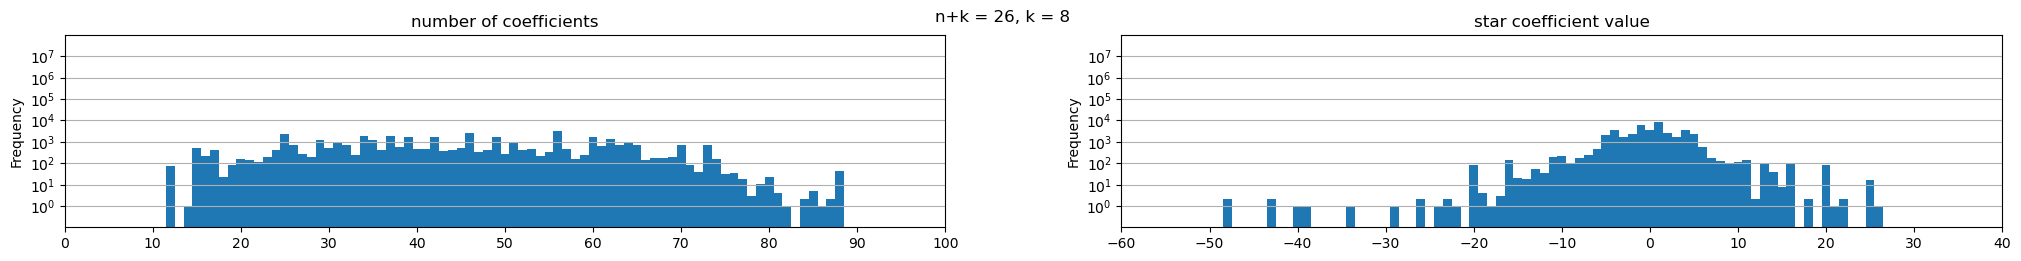

star coefficient value counts: (-48, 2) (-43, 2) (-40, 1) (-39, 1) (-34, 1) ... (20, 79) (21, 1) (22, 2) (25, 17) (26, 1)
----------


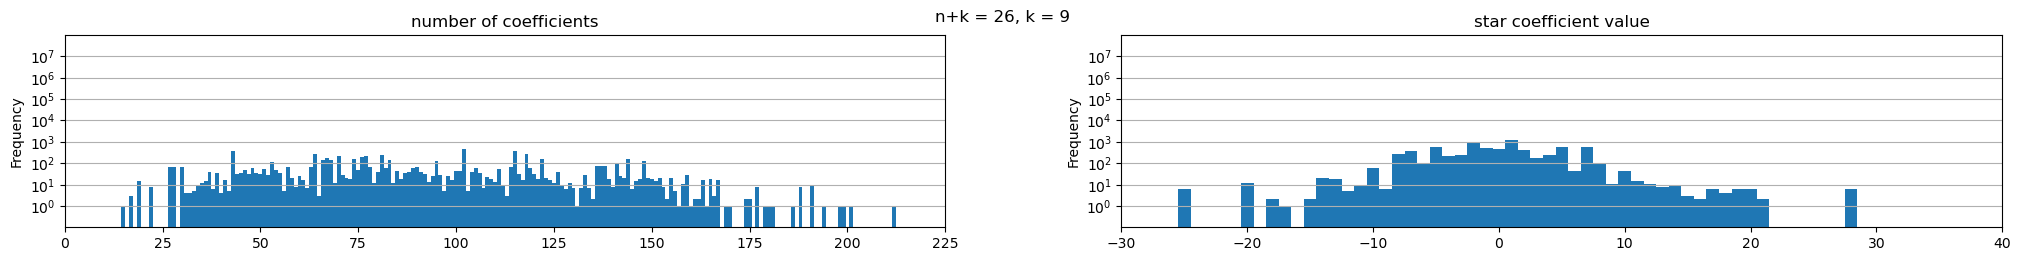

star coefficient value counts: (-25, 6) (-20, 12) (-18, 2) (-17, 1) (-15, 2) ... (18, 4) (19, 6) (20, 6) (21, 2) (28, 6)
----------


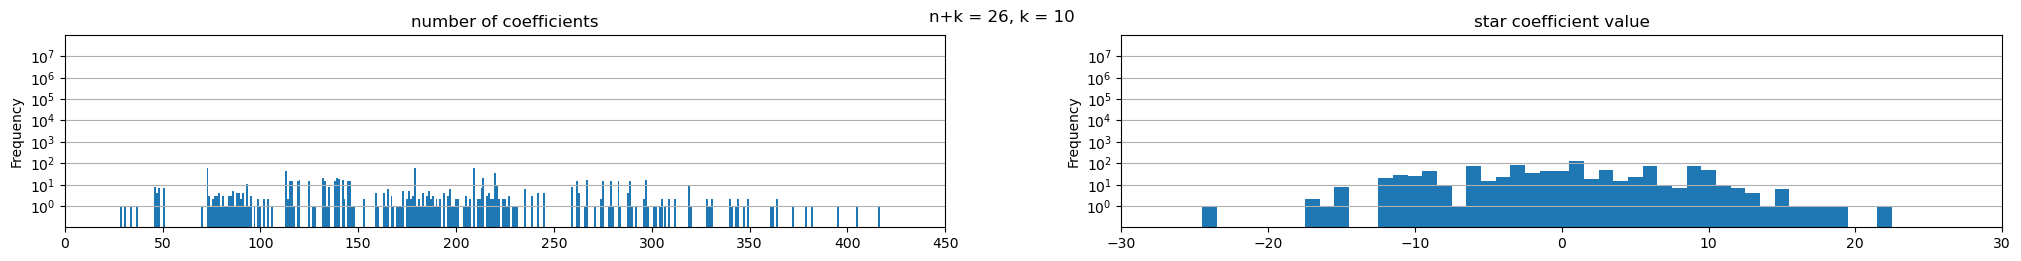

star coefficient value counts: (-24, 1) (-17, 2) (-16, 1) (-15, 8) (-12, 20) ... (16, 1) (17, 1) (18, 1) (19, 1) (22, 1)
----------


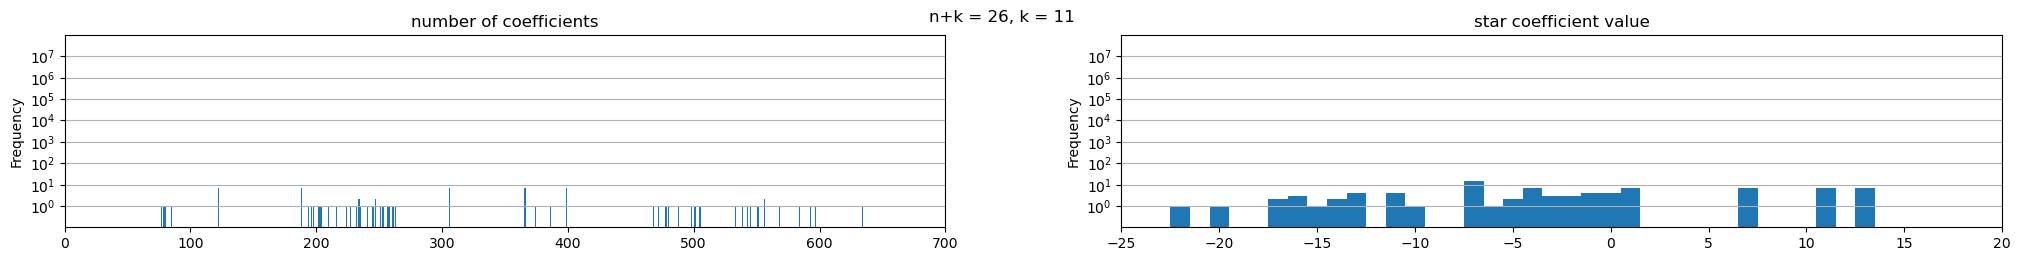

star coefficient value counts: (-22, 1) (-20, 1) (-17, 2) (-16, 3) (-15, 1) ... (0, 4) (1, 7) (7, 7) (11, 7) (13, 7)
----------


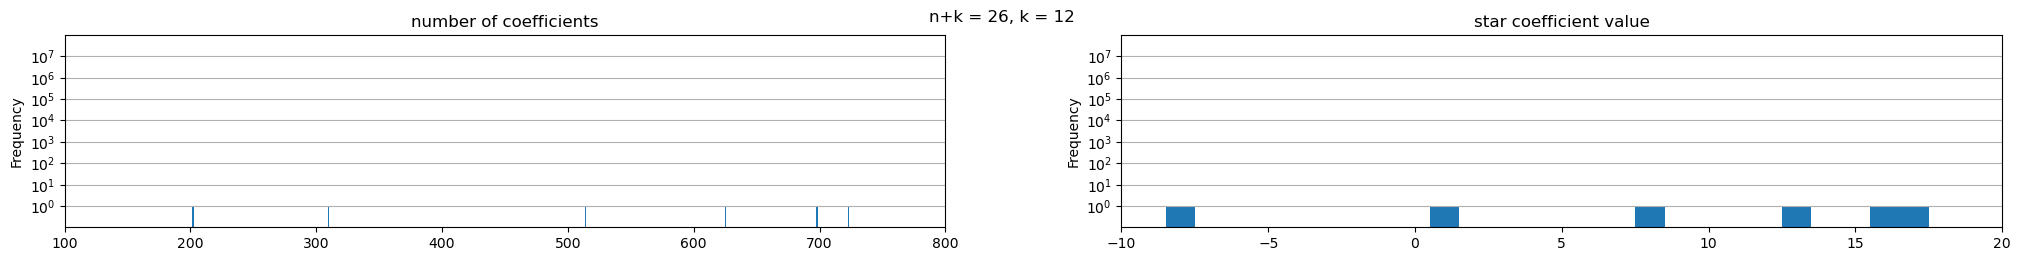

star coefficient value counts: (-8, 1) (1, 1) (8, 1) (13, 1) (16, 1) (17, 1)
----------


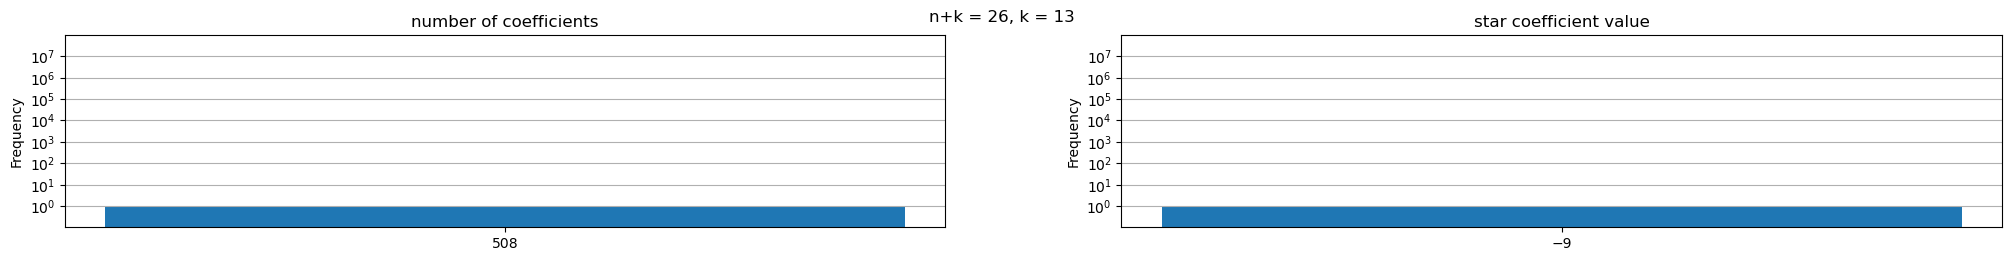

star coefficient value counts: (-9, 1)
----------


In [6]:
plot_histograms(df_stats_dP, 26)


# The Bridgeless 3-pole, 4-pole, and 5-pole With the Largest Star Coefficient Value

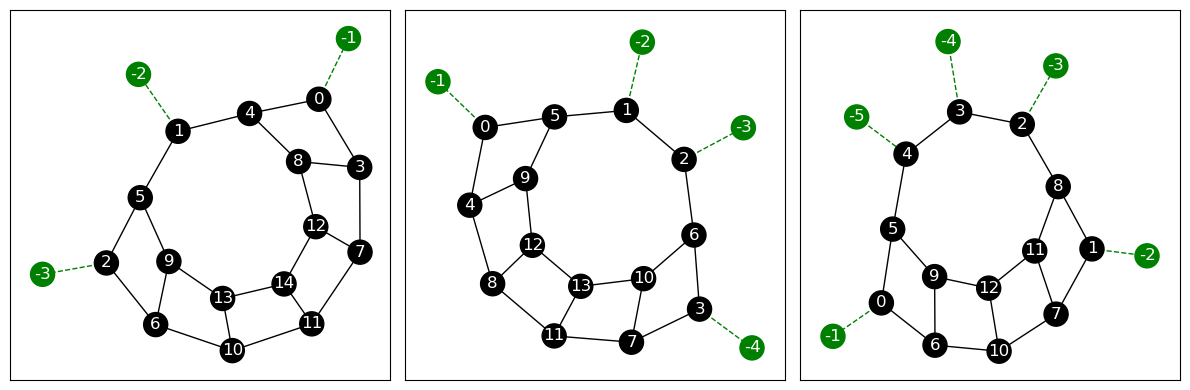

In [7]:
plot_from_files([
    'graphs/max_star/3-18.txt',
    'graphs/max_star/4-18.txt',
    'graphs/max_star/5-18.txt',
])


---

In [8]:
def load_k4(path):
    return pd.read_table(path, names=['n', 'star', 'second', 'third'], sep=' ')

def plot_k4(df, v):
    df_v = df[4 + df.n == v]
    df_agg = df_v.groupby(['star', 'second', 'third']).size().reset_index(name='cnt')
    df_agg['colorings'] = 21*df_agg.star + 9*(df_agg.second + df_agg.third)

    assert (df_agg.star >= 0).all()
    assert (df_agg.star + df_agg.second >= 0).all()
    assert (df_agg.star + df_agg.third >= 0).all()
    assert (df_agg.star + df_agg.second + df_agg.third >= 0).all()

    fig = plt.figure(figsize=(12, 6))
    fig.suptitle('n+k = {}, k = 4'.format(v))

    xs, ys, zs = df_agg.star, df_agg.second, df_agg.third
    ax = fig.add_subplot(121, projection='3d')
    ax.set_xlabel('star value')
    ax.set_ylabel('second value')
    ax.set_zlabel('third value')
    min_ = min(xs.min(), ys.min(), zs.min())-5
    max_ = max(xs.max(), ys.max(), zs.max())+5
    ax.set_xlim(min_, max_)
    ax.set_ylim(min_, max_)
    ax.set_zlim(min_, max_)
    ax.set_aspect('equal')
    ax.scatter(xs, ys, zs, c=df_agg.cnt, cmap='copper', norm=mpl.colors.LogNorm(), s=5)
    ax.view_init(15, -135)

    xs, ys = df_agg.star, df_agg.second + df_agg.third
    ax = fig.add_subplot(122)
    ax.set_xlabel('star value')
    ax.set_ylabel('second value + third value')
    min_ = min(xs.min(), ys.min())-5
    max_ = max(xs.max(), ys.max())+5
    ax.set_xlim(min_, max_)
    ax.set_ylim(min_, max_)
    ax.set_aspect('equal')
    ax.scatter(xs, ys, c=df_agg.cnt, cmap='copper', norm=mpl.colors.LogNorm(), s=5)

    lsp = np.linspace(min_, max_, 500)
    X, Y = np.meshgrid(lsp, lsp)
    Z = 21*X + 9*Y
    Z[(X < 0) | (X + Y < 0)] = np.nan
    ax.imshow(Z, extent=[min_, max_, min_, max_], cmap='Greens', origin='lower')
    ax.axline((0, 0), slope=9/21, color='k', linestyle='--', linewidth=0.5)
    ax.text(max_-5, max_-5, 'color stregth = number of colorings\ndotted line = max gradient', ha='right', va='top')

    plt.grid()
    plt.tight_layout()
    plt.show()

    return df_agg.sort_values(by='colorings')


# Coeffcient Values for $k=4$ (Bridges Allowed)

In [9]:
df_k4_c2m2dP4 = load_k4('computed/k4-c2m2dP4-26.txt.gz')


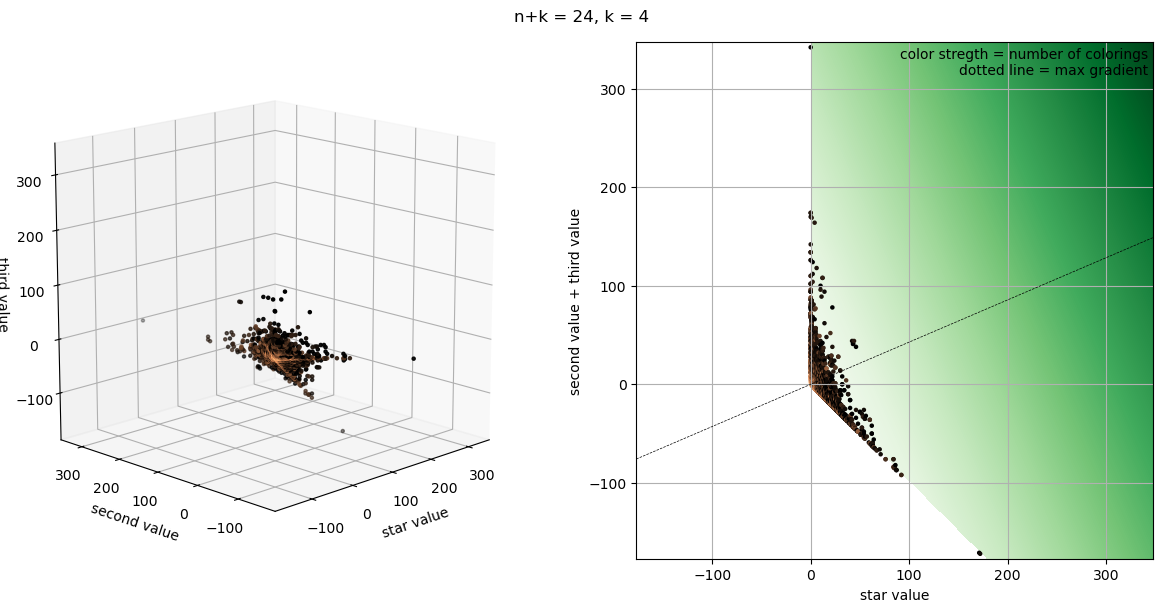

,star,second,third,cnt,colorings
130,1,-1,0,138564,12
134,1,0,-1,34245,12
0,0,1,1,55657,18
283,2,-2,0,4465,24
293,2,0,-2,1858,24
...,...,...,...,...,...
128,0,169,5,4,1566
121,0,89,85,2,1566
2758,171,-170,-1,1,2052
2759,172,0,-172,2,2064


In [10]:
plot_k4(df_k4_c2m2dP4, 24)


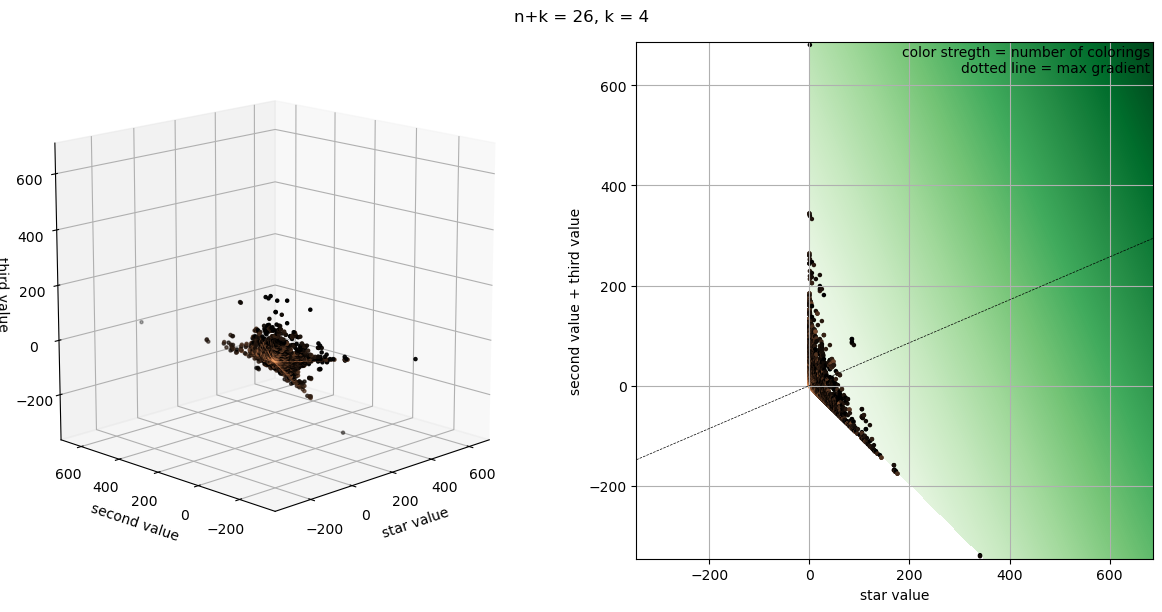

,star,second,third,cnt,colorings
302,1,-1,0,812857,12
307,1,0,-1,195579,12
0,0,1,1,325390,18
648,2,-2,0,39248,24
661,2,0,-2,13475,24
...,...,...,...,...,...
300,0,340,4,4,3096
1977,5,338,-5,4,3102
9228,341,0,-341,2,4092
9227,341,-341,2,1,4110


In [11]:
plot_k4(df_k4_c2m2dP4, 26)


# Coeffcient Values for $k=4$ (Bridges Forbidden)

In [12]:
df_k4_dP4 = load_k4('computed/k4-dP4-26.txt.gz')


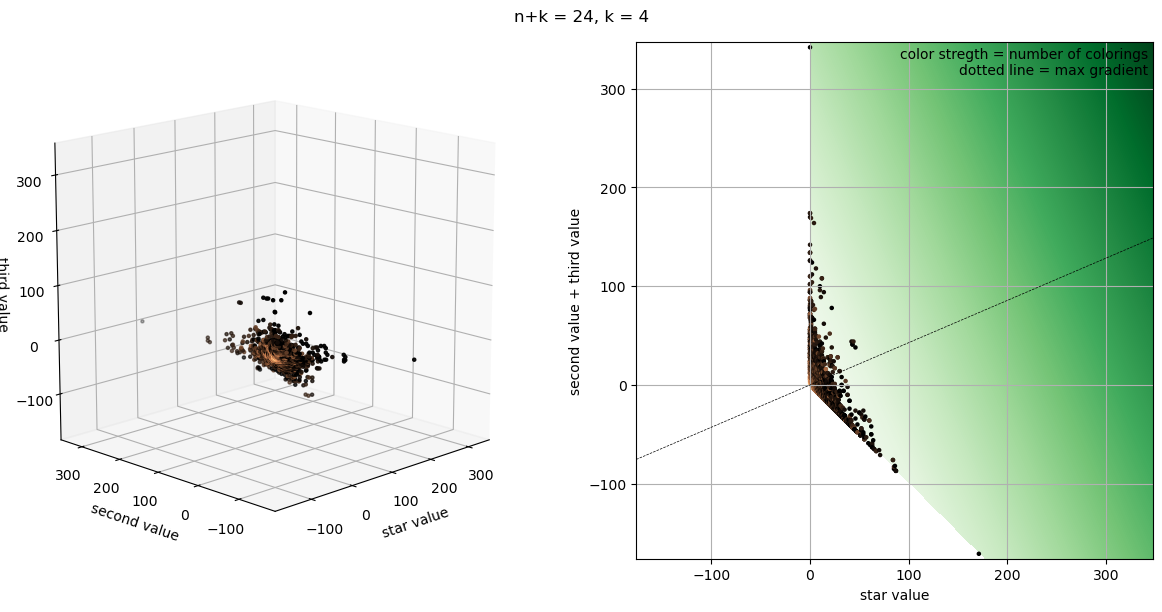

,star,second,third,cnt,colorings
0,0,1,1,55657,18
287,2,-1,-1,5396,24
145,1,2,-1,46308,30
138,1,1,0,404,30
134,1,0,1,4909,30
...,...,...,...,...,...
691,4,168,-4,4,1560
129,0,169,5,4,1566
122,0,89,85,2,1566
2662,171,-170,-1,1,2052


In [13]:
plot_k4(df_k4_dP4, 24)


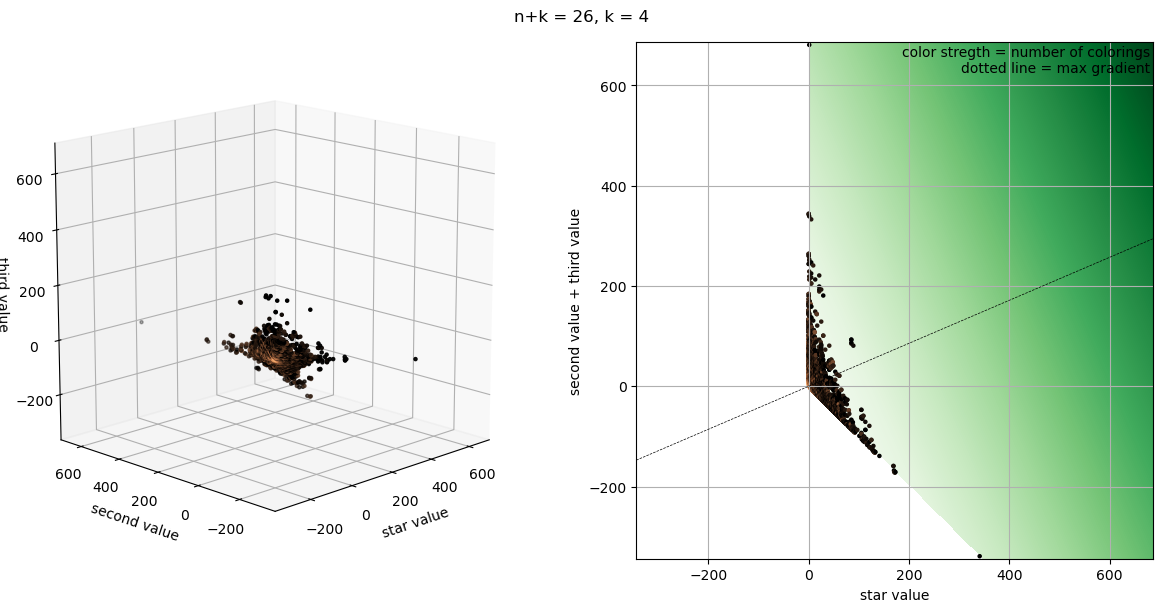

,star,second,third,cnt,colorings
0,0,1,1,325390,18
653,2,-1,-1,33887,24
307,1,0,1,33325,30
312,1,1,0,2555,30
319,1,2,-1,272431,30
...,...,...,...,...,...
296,0,172,172,2,3096
301,0,340,4,4,3096
1970,5,338,-5,4,3102
9065,341,-341,2,1,4110


In [14]:
plot_k4(df_k4_dP4, 26)


# The Bridgeless 4-pole With the Largest Number of Colorings

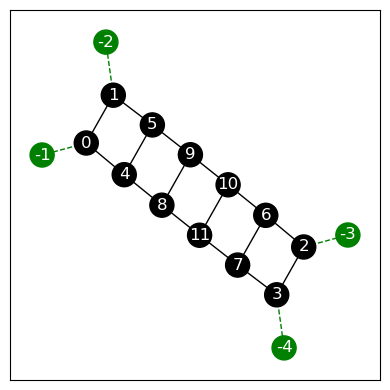

In [15]:
plot_from_files(['graphs/k4_max_colorings/16.txt'])
